<a href="https://colab.research.google.com/github/anshupandey/MSA-analytics/blob/main/POTMS2/Lab5_Ocean_Hull_Insurance_Factor_Predictive_Sharpe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔍 Factor-Based Risk Analysis, Predictive Modeling, and Sharpe Ratio Analysis

This notebook explores:
- **Exercise 1**: Factor-Based Risk Analysis
- **Exercise 2**: Predictive Modeling for Claim Occurrence
- **Exercise 3**: Sharpe Ratio Analyzer

We continue using the Ocean Hull Insurance dataset.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
sns.set(style='whitegrid')


## 📥 Load Dataset

In [2]:
# Replace with actual path if needed
df = pd.read_csv('https://raw.githubusercontent.com/anshupandey/MSA-analytics/refs/heads/main/datasets/Ocean_Hull_Insurance_datasetv2.csv')
df.head()

,Vessel_ID,Vessel_Type,Operating_Zone,Vessel_Age,Flag_State,Inspection_Status,Weather_Risk,Piracy_Risk,Claim_Occurred,Claim_Amount,Premium,Sum_Insured,Daily_Return,Initial_Investment,Final_Value
0,1,Container Ship,Strait of Malacca,19,Marshall Islands,Overdue,Moderate,Moderate,0,0,159500,14050000,0.000997,95700.0,104676.840752
1,2,Container Ship,Strait of Malacca,40,Marshall Islands,Up-to-date,High,High,0,0,170000,13000000,0.000362,102000.0,105374.760051
2,3,Tanker,Indian Ocean,26,Greece,Delayed,Low,Low,0,0,193000,18700000,0.001148,115800.0,128393.183954
3,4,Bulk Carrier,South China Sea,7,Greece,Up-to-date,Moderate,Low,0,0,123500,11650000,0.002023,74100.0,88881.524555
4,5,Offshore Support Vessel,Mediterranean,18,Liberia,Delayed,Low,Low,0,0,109000,7100000,0.000266,65400.0,66983.429972


## 🧪 Exercise 1: Factor-Based Risk Analysis

<ipython-input-3-1790779342>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=factor, y='Claim_Amount', estimator=np.mean, ci=None)


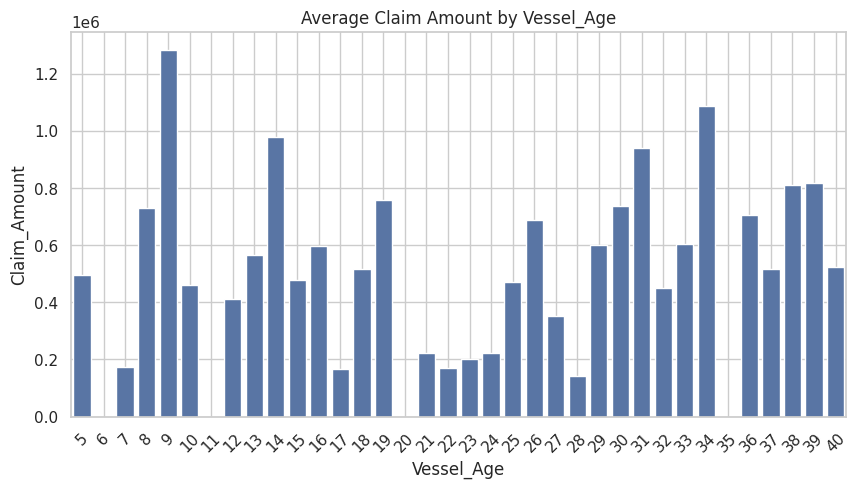

<ipython-input-3-1790779342>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=factor, y='Claim_Amount', estimator=np.mean, ci=None)


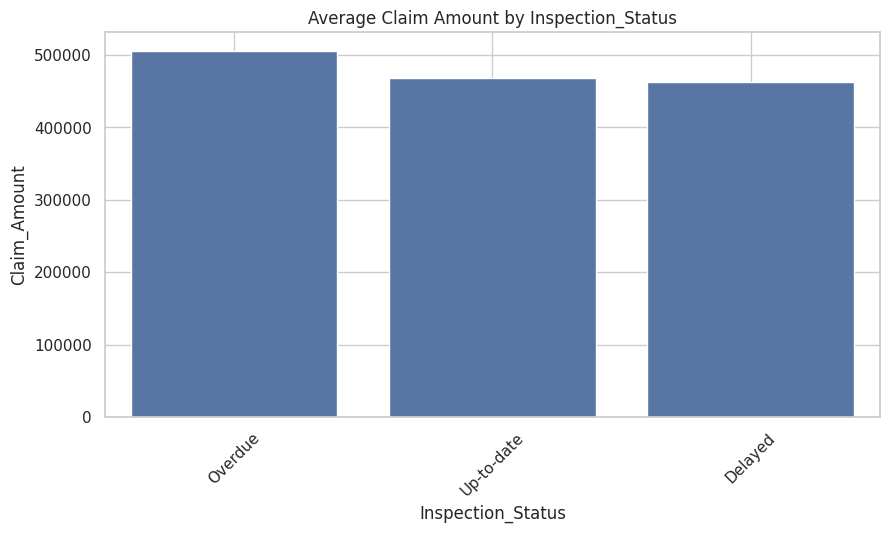

<ipython-input-3-1790779342>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=factor, y='Claim_Amount', estimator=np.mean, ci=None)


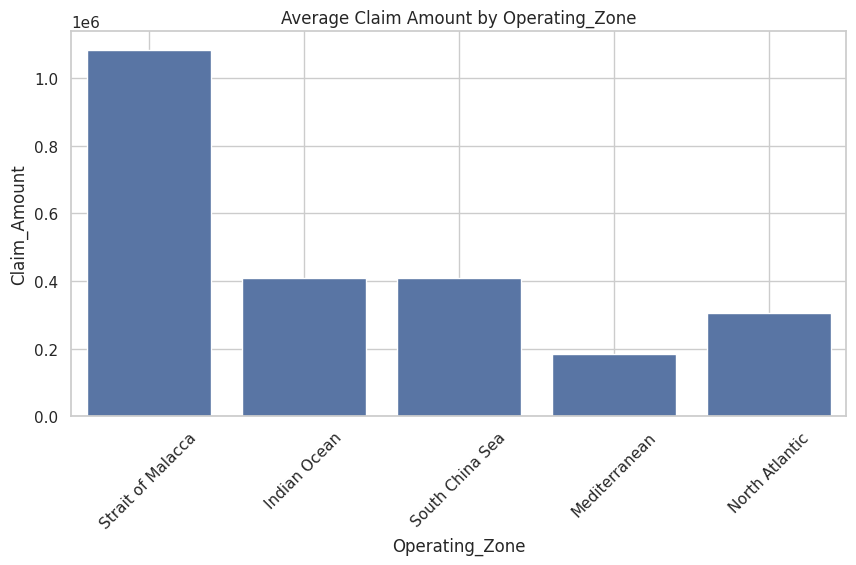

<ipython-input-3-1790779342>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=factor, y='Claim_Amount', estimator=np.mean, ci=None)


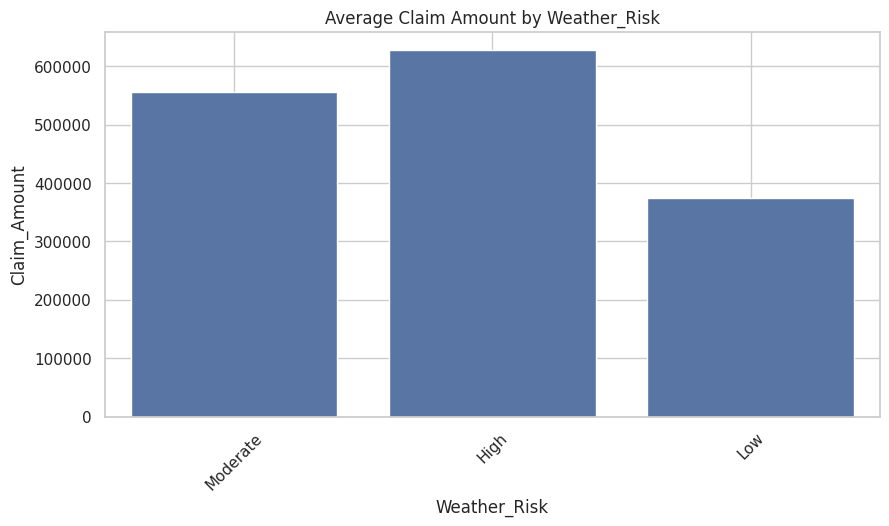

<ipython-input-3-1790779342>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=factor, y='Claim_Amount', estimator=np.mean, ci=None)


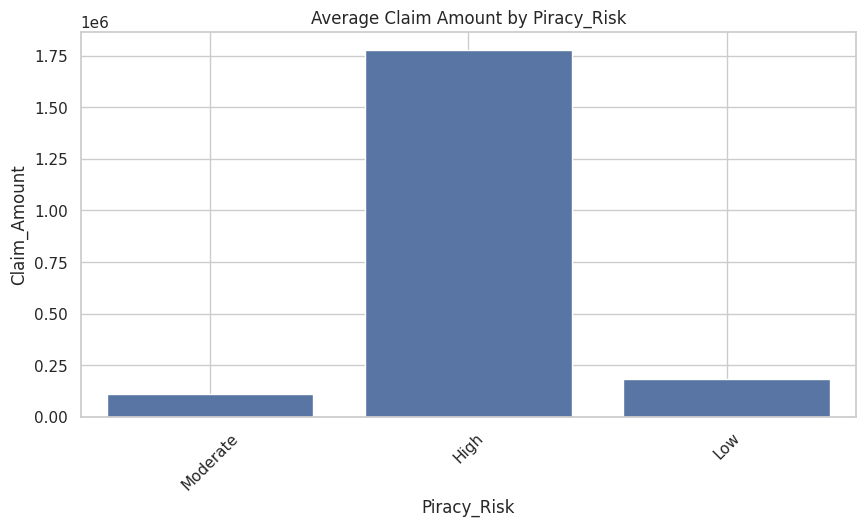

In [3]:

# Grouping and visualization
factors = ['Vessel_Age', 'Inspection_Status', 'Operating_Zone', 'Weather_Risk', 'Piracy_Risk']

for factor in factors:
    plt.figure(figsize=(10,5))
    sns.barplot(data=df, x=factor, y='Claim_Amount', estimator=np.mean, ci=None)
    plt.title(f'Average Claim Amount by {factor}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


## 🧪 Exercise 2: Predictive Modeling for Claim Occurrence

In [4]:
# Encode categorical features
df_model = df.copy()
df_model = pd.get_dummies(df_model, columns=['Vessel_Type', 'Flag_State', 'Inspection_Status', 'Operating_Zone', 'Weather_Risk', 'Piracy_Risk'], drop_first=True)

# Features and target
features = df_model.drop(columns=['Vessel_ID', 'Claim_Amount', 'Claim_Occurred', 'Policy_Date', 'Month'], errors='ignore')
target = df_model['Claim_Occurred']

In [5]:
features.head()

,Vessel_Age,Premium,Sum_Insured,Daily_Return,Initial_Investment,Final_Value,Vessel_Type_Container Ship,Vessel_Type_Offshore Support Vessel,Vessel_Type_Tanker,Flag_State_Liberia,...,Inspection_Status_Overdue,Inspection_Status_Up-to-date,Operating_Zone_Mediterranean,Operating_Zone_North Atlantic,Operating_Zone_South China Sea,Operating_Zone_Strait of Malacca,Weather_Risk_Low,Weather_Risk_Moderate,Piracy_Risk_Low,Piracy_Risk_Moderate
0,19,159500,14050000,0.000997,95700.0,104676.840752,True,False,False,False,...,True,False,False,False,False,True,False,True,False,True
1,40,170000,13000000,0.000362,102000.0,105374.760051,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
2,26,193000,18700000,0.001148,115800.0,128393.183954,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,7,123500,11650000,0.002023,74100.0,88881.524555,False,False,False,False,...,False,True,False,False,True,False,False,True,True,False
4,18,109000,7100000,0.000266,65400.0,66983.429972,False,True,False,True,...,False,False,True,False,False,False,True,False,True,False


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)



In [7]:
# Train models
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate
print("Logistic Regression:")
print(classification_report(y_test, lr.predict(X_test)))

print("\nRandom Forest:")
print(classification_report(y_test, rf.predict(X_test)))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        61
           1       0.00      0.00      0.00        29

    accuracy                           0.68        90
   macro avg       0.34      0.50      0.40        90
weighted avg       0.46      0.68      0.55        90


Random Forest:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        61
           1       0.93      0.48      0.64        29

    accuracy                           0.82        90
   macro avg       0.87      0.73      0.76        90
weighted avg       0.84      0.82      0.80        90



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 🧪 Exercise 3: Sharpe Ratio Analyzer

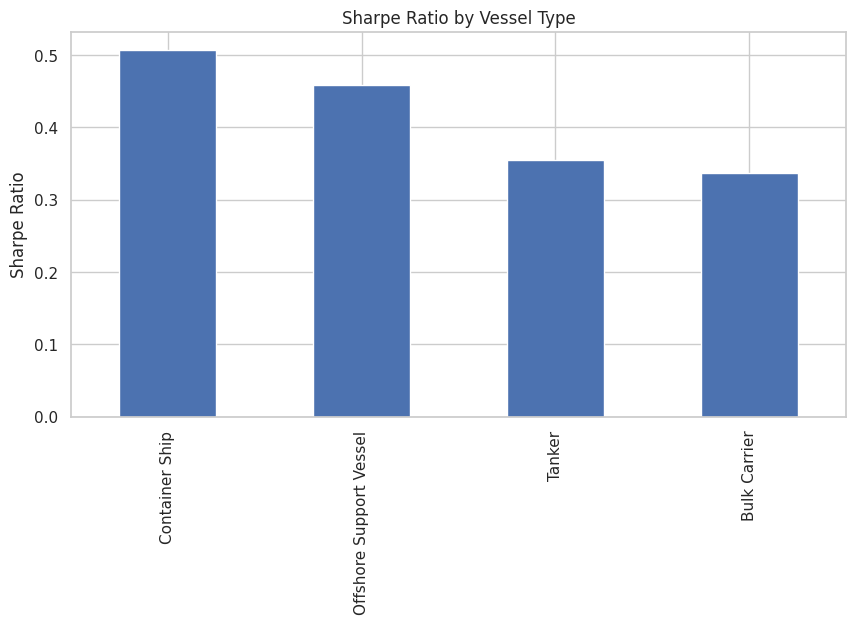

,Sharpe_Ratio
Container Ship,0.506774
Offshore Support Vessel,0.458499
Tanker,0.355283
Bulk Carrier,0.337241


In [9]:

sharpe_ratios = {}
risk_free_rate = 0.0001

for vessel in df['Vessel_Type'].unique():
    subset = df[df['Vessel_Type'] == vessel]
    excess_return = subset['Daily_Return'] - risk_free_rate
    sharpe = excess_return.mean() / excess_return.std()
    sharpe_ratios[vessel] = sharpe

# Convert to DataFrame
sharpe_df = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=['Sharpe_Ratio'])
sharpe_df = sharpe_df.sort_values(by='Sharpe_Ratio', ascending=False)
sharpe_df.plot(kind='bar', figsize=(10,5), legend=False, title='Sharpe Ratio by Vessel Type')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.show()
sharpe_df



## 📌 Summary of Findings

- **Factor Analysis** showed that overdue inspections and high-risk zones significantly increase claim amounts.
- **Predictive Models** like Random Forest can reasonably predict claim occurrence based on vessel characteristics and risk factors.
- **Sharpe Ratio** helped identify the most efficient vessel types in terms of investment return vs. risk, supporting capital allocation decisions.
